## Data Aggregation

Problem Statement: Analyzing Sales Performance by Region in a Retail Company

Dataset: "Retail_Sales_Data.csv" Description: The dataset contains information about sales transactions in a retail company. It includes attributes such as transaction date, product category, quantity sold, and sales amount. The goal is to perform data aggregation to analyze the sales performance by region and identify the top-performing regions. Tasks to Perform:

- Import the "Retail_Sales_Data.csv" dataset.
- Explore the dataset to understand its structure and content.
- Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.
- Group the sales data by region and calculate the total sales amount for each region.
- Create bar plots or pie charts to visualize the sales distribution by region.
- Identify the top-performing regions based on the highest sales amount.
- Group the sales data by region and product category to calculate the total sales amount for each combination.
- Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.shape

(99457, 10)

In [7]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [8]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [25]:
df.shape

(99457, 10)

In [26]:
# groupby region wise by using 'shopping mall' 
df.groupby('shopping_mall').count()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Cevahir AVM,4991,4991,4991,4991,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914,4914,4914,4914,4914


In [27]:
# cateorywise sales count

df.groupby('category').count()

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Books,4981,4981,4981,4981,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087,10087,10087,10087,10087


In [28]:
branch_sales = df.groupby('shopping_mall').sum()

In [29]:
branch_sales

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Cevahir AVM,I179802I992454I412481I823067I655874I221715I870...,C312861C196845C125696C322947C447138C187266C169...,MaleMaleFemaleMaleFemaleFemaleMaleFemaleFemale...,215474,ClothingToysFood & BeverageClothingShoesFood &...,14949,3433671.84,CashCashCashCredit CardCashCashCredit CardDebi...,17/11/20227/3/20231/5/202118/06/202223/08/2022...
Emaar Square Mall,I139207I183746I217053I331891I339732I246562I276...,C191708C220180C192344C501658C276887C227070C136...,FemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFema...,209575,BooksClothingShoesClothingFood & BeverageCosme...,14501,3390408.31,Credit CardCredit CardCashCredit CardCredit Ca...,28/10/202215/02/202310/10/202221/11/20214/1/20...
Forum Istanbul,I317333I227836I304265I402376I153930I134452I133...,C111565C657758C653385C309926C567813C112750C271...,MaleFemaleFemaleMaleMaleFemaleFemaleMaleFemale...,215380,ShoesClothingBooksShoesFood & BeverageClothing...,14852,3336073.82,Debit CardCredit CardDebit CardCashCashCredit ...,12/12/202124/05/202213/06/202110/9/20229/8/202...
Istinye Park,I121056I195396I209744I202367I664787I148377I204...,C151197C285161C251229C317478C237330C841663C173...,FemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFe...,424335,CosmeticsToysCosmeticsBooksCosmeticsClothingSo...,29465,6717077.54,CashDebit CardCredit CardCashCredit CardCashDe...,13/03/202216/05/202129/04/202124/02/202312/1/2...
Kanyon,I138884I337046I326945I336189I252275I768348I147...,C241288C189076C283361C555402C313348C176727C245...,FemaleFemaleFemaleFemaleMaleFemaleMaleMaleFema...,862280,ClothingBooksClothingClothingTechnologyShoesCl...,59457,13710755.24,Credit CardCashCredit CardCredit CardCashCredi...,5/8/202224/10/202122/08/20213/6/202226/10/2021...
Mall of Istanbul,I293112I196704I161949I267193I133061I157285I181...,C176086C289625C159164C317818C336576C123427C119...,FemaleFemaleFemaleFemaleMaleMaleMaleFemaleMale...,866333,ClothingCosmeticsToysCosmeticsClothingClothing...,60114,13851737.62,Credit CardCredit CardDebit CardCredit CardCre...,13/01/202120/04/20224/7/202212/1/20239/6/20226...
Metrocity,I127801I293455I306368I640508I294687I174250I109...,C266599C159642C240286C225330C300786C204553C232...,MaleMaleFemaleFemaleMaleFemaleMaleFemaleFemale...,652968,ClothingClothingFood & BeverageToysBooksBooksC...,44894,10249980.07,CashCredit CardCashDebit CardDebit CardCashDeb...,9/11/20214/11/202125/12/202231/07/202216/01/20...
Metropol AVM,I173702I993048I473411I138674I218590I195567I297...,C988172C218149C452806C155059C224743C992677C183...,FemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMa...,439086,ShoesClothingClothingCosmeticsCosmeticsClothin...,30530,6937992.99,Credit CardCashCashCredit CardDebit CardDebit ...,16/05/202126/07/202119/12/202214/02/20229/5/20...
Viaport Outlet,I688768I137794I283443I200392I147334I307534I176...,C362288C133687C189493C307921C306395C434171C876...,MaleFemaleMaleFemaleMaleFemaleFemaleMaleFemale...,212771,ShoesFood & BeverageTechnologyClothingClothing...,14716,3414019.46,Credit CardDebit CardCredit CardCredit CardCas...,7/11/202112/3/202125/05/202214/09/202112/1/202...


In [20]:
branch_sales.sort_values(by = "price", ascending = False)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Mall of Istanbul,I293112I196704I161949I267193I133061I157285I181...,C176086C289625C159164C317818C336576C123427C119...,FemaleFemaleFemaleFemaleMaleMaleMaleFemaleMale...,866333,ClothingCosmeticsToysCosmeticsClothingClothing...,60114,13851737.62,Credit CardCredit CardDebit CardCredit CardCre...,13/01/202120/04/20224/7/202212/1/20239/6/20226...
Kanyon,I138884I337046I326945I336189I252275I768348I147...,C241288C189076C283361C555402C313348C176727C245...,FemaleFemaleFemaleFemaleMaleFemaleMaleMaleFema...,862280,ClothingBooksClothingClothingTechnologyShoesCl...,59457,13710755.24,Credit CardCashCredit CardCredit CardCashCredi...,5/8/202224/10/202122/08/20213/6/202226/10/2021...
Metrocity,I127801I293455I306368I640508I294687I174250I109...,C266599C159642C240286C225330C300786C204553C232...,MaleMaleFemaleFemaleMaleFemaleMaleFemaleFemale...,652968,ClothingClothingFood & BeverageToysBooksBooksC...,44894,10249980.07,CashCredit CardCashDebit CardDebit CardCashDeb...,9/11/20214/11/202125/12/202231/07/202216/01/20...
Metropol AVM,I173702I993048I473411I138674I218590I195567I297...,C988172C218149C452806C155059C224743C992677C183...,FemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMa...,439086,ShoesClothingClothingCosmeticsCosmeticsClothin...,30530,6937992.99,Credit CardCashCashCredit CardDebit CardDebit ...,16/05/202126/07/202119/12/202214/02/20229/5/20...
Istinye Park,I121056I195396I209744I202367I664787I148377I204...,C151197C285161C251229C317478C237330C841663C173...,FemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFe...,424335,CosmeticsToysCosmeticsBooksCosmeticsClothingSo...,29465,6717077.54,CashDebit CardCredit CardCashCredit CardCashDe...,13/03/202216/05/202129/04/202124/02/202312/1/2...
Zorlu Center,I195744I167211I246550I117291I205366I269690I140...,C330667C164092C716788C134449C241642C126436C218...,FemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFe...,220926,Food & BeverageShoesFood & BeverageBooksClothi...,15234,3509649.02,Credit CardCredit CardCashCredit CardDebit Car...,5/1/202230/08/202210/9/20219/12/20227/11/20227...
Cevahir AVM,I179802I992454I412481I823067I655874I221715I870...,C312861C196845C125696C322947C447138C187266C169...,MaleMaleFemaleMaleFemaleFemaleMaleFemaleFemale...,215474,ClothingToysFood & BeverageClothingShoesFood &...,14949,3433671.84,CashCashCashCredit CardCashCashCredit CardDebi...,17/11/20227/3/20231/5/202118/06/202223/08/2022...
Viaport Outlet,I688768I137794I283443I200392I147334I307534I176...,C362288C133687C189493C307921C306395C434171C876...,MaleFemaleMaleFemaleMaleFemaleFemaleMaleFemale...,212771,ShoesFood & BeverageTechnologyClothingClothing...,14716,3414019.46,Credit CardDebit CardCredit CardCredit CardCas...,7/11/202112/3/202125/05/202214/09/202112/1/202...
Emaar Square Mall,I139207I183746I217053I331891I339732I246562I276...,C191708C220180C192344C501658C276887C227070C136...,FemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFema...,209575,BooksClothingShoesClothingFood & BeverageCosme...,14501,3390408.31,Credit CardCredit CardCashCredit CardCredit Ca...,28/10/202215/02/202310/10/202221/11/20214/1/20...


In [30]:
category_sales = df.groupby('category').sum()

In [31]:
category_sales

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Books,I337046I139207I294687I174250I117291I304265I202...,C189076C191708C300786C204553C134449C653385C317...,FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...,216882,14982,226977.30,CashCredit CardDebit CardCashCredit CardDebit ...,24/10/202128/10/202216/01/202116/12/20229/12/2...,KanyonEmaar Square MallMetrocityMetrocityZorlu...
Clothing,I138884I127801I227836I293112I293455I326945I179...,C241288C266599C657758C176086C159642C283361C312...,FemaleMaleFemaleFemaleMaleFemaleMaleFemaleFema...,1497054,103558,31075684.64,Credit CardCashCredit CardCredit CardCredit Ca...,5/8/20229/11/202124/05/202213/01/20214/11/2021...,KanyonMetrocityForum IstanbulMall of IstanbulM...
Cosmetics,I121056I196704I209744I138674I752693I267193I269...,C151197C289625C251229C155059C306662C317818C126...,FemaleFemaleMaleMaleFemaleFemaleMaleFemaleFema...,657937,45465,1848606.90,CashCredit CardCredit CardCredit CardCashCredi...,13/03/202220/04/202229/04/202114/02/202228/04/...,Istinye ParkMall of IstanbulIstinye ParkMetrop...
Food & Beverage,I306368I195744I412481I339732I246550I137794I263...,C240286C330667C125696C276887C716788C133687C112...,FemaleFemaleFemaleMaleFemaleFemaleFemaleFemale...,640605,44277,231568.71,CashCredit CardCashCredit CardCashDebit CardCa...,25/12/20225/1/20221/5/20214/1/202310/9/202112/...,MetrocityZorlu CenterCevahir AVMEmaar Square M...
Shoes,I317333I173702I688768I217053I655874I768348I167...,C111565C988172C362288C192344C447138C176727C164...,MaleFemaleMaleMaleFemaleFemaleFemaleFemaleFema...,436027,30217,18135336.89,Debit CardCredit CardCredit CardCashCashCredit...,12/12/202116/05/20217/11/202110/10/202223/08/2...,Forum IstanbulMetropol AVMViaport OutletEmaar ...
Souvenir,I204979I870944I151332I317105I317140I141241I285...,C173084C169749C168491C177975C326893C143442C194...,FemaleMaleMaleFemaleFemaleMaleFemaleFemaleFema...,216922,14871,174436.83,Debit CardCredit CardCashDebit CardCashCredit ...,14/03/20218/6/202125/03/202129/07/202119/10/20...,Istinye ParkCevahir AVMKanyonKanyonIstinye Par...
Technology,I252275I160777I883721I289643I283443I164665I122...,C313348C626042C236859C584700C189493C255058C989...,MaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFe...,216669,15021,15772050.00,CashCashCredit CardCashCredit CardCashCredit C...,26/10/202122/02/202219/11/202122/08/202225/05/...,KanyonMetrocityMall of IstanbulKanyonViaport O...
Toys,I640508I992454I195396I161949I258195I181109I260...,C225330C196845C285161C159164C213742C119549C258...,FemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFema...,437032,30321,1086704.64,Debit CardCashDebit CardDebit CardCashCashCash...,31/07/20227/3/202316/05/20214/7/202226/11/2021...,MetrocityCevahir AVMIstinye ParkMall of Istanb...


In [32]:
category_sales.sort_values(by='price',ascending=False)

,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Clothing,I138884I127801I227836I293112I293455I326945I179...,C241288C266599C657758C176086C159642C283361C312...,FemaleMaleFemaleFemaleMaleFemaleMaleFemaleFema...,1497054,103558,31075684.64,Credit CardCashCredit CardCredit CardCredit Ca...,5/8/20229/11/202124/05/202213/01/20214/11/2021...,KanyonMetrocityForum IstanbulMall of IstanbulM...
Shoes,I317333I173702I688768I217053I655874I768348I167...,C111565C988172C362288C192344C447138C176727C164...,MaleFemaleMaleMaleFemaleFemaleFemaleFemaleFema...,436027,30217,18135336.89,Debit CardCredit CardCredit CardCashCashCredit...,12/12/202116/05/20217/11/202110/10/202223/08/2...,Forum IstanbulMetropol AVMViaport OutletEmaar ...
Technology,I252275I160777I883721I289643I283443I164665I122...,C313348C626042C236859C584700C189493C255058C989...,MaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFe...,216669,15021,15772050.00,CashCashCredit CardCashCredit CardCashCredit C...,26/10/202122/02/202219/11/202122/08/202225/05/...,KanyonMetrocityMall of IstanbulKanyonViaport O...
Cosmetics,I121056I196704I209744I138674I752693I267193I269...,C151197C289625C251229C155059C306662C317818C126...,FemaleFemaleMaleMaleFemaleFemaleMaleFemaleFema...,657937,45465,1848606.90,CashCredit CardCredit CardCredit CardCashCredi...,13/03/202220/04/202229/04/202114/02/202228/04/...,Istinye ParkMall of IstanbulIstinye ParkMetrop...
Toys,I640508I992454I195396I161949I258195I181109I260...,C225330C196845C285161C159164C213742C119549C258...,FemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFema...,437032,30321,1086704.64,Debit CardCashDebit CardDebit CardCashCashCash...,31/07/20227/3/202316/05/20214/7/202226/11/2021...,MetrocityCevahir AVMIstinye ParkMall of Istanb...
Food & Beverage,I306368I195744I412481I339732I246550I137794I263...,C240286C330667C125696C276887C716788C133687C112...,FemaleFemaleFemaleMaleFemaleFemaleFemaleFemale...,640605,44277,231568.71,CashCredit CardCashCredit CardCashDebit CardCa...,25/12/20225/1/20221/5/20214/1/202310/9/202112/...,MetrocityZorlu CenterCevahir AVMEmaar Square M...
Books,I337046I139207I294687I174250I117291I304265I202...,C189076C191708C300786C204553C134449C653385C317...,FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...,216882,14982,226977.30,CashCredit CardDebit CardCashCredit CardDebit ...,24/10/202128/10/202216/01/202116/12/20229/12/2...,KanyonEmaar Square MallMetrocityMetrocityZorlu...
Souvenir,I204979I870944I151332I317105I317140I141241I285...,C173084C169749C168491C177975C326893C143442C194...,FemaleMaleMaleFemaleFemaleMaleFemaleFemaleFema...,216922,14871,174436.83,Debit CardCredit CardCashDebit CardCashCredit ...,14/03/20218/6/202125/03/202129/07/202119/10/20...,Istinye ParkCevahir AVMKanyonKanyonIstinye Par...


In [33]:
combined_sales  = df.groupby(['shopping_mall' , 'category']).sum()


In [34]:
combined_sales

invoice_no  \
shopping_mall category                                                             
Cevahir AVM   Books            I181621I176043I724118I207734I140633I311777I335...   
              Clothing         I179802I823067I172458I215998I311052I417106I783...   
              Cosmetics        I251855I119142I101148I332003I323928I225327I462...   
              Food & Beverage  I412481I221715I112291I112481I289841I273820I212...   
              Shoes            I655874I570709I472142I125122I165160I152436I338...   
...                                                                          ...   
Zorlu Center  Food & Beverage  I195744I246550I119809I100033I321373I169684I133...   
              Shoes            I167211I202398I533184I295482I551504I172592I255...   
              Souvenir         I601026I263818I185316I261248I296279I688566I964...   
              Technology       I530401I337094I318625I301887I713320I580474I158...   
              Toys             I186896I133240I251779I742965I539167I106866I425...   

                                                                     customer_id  \
shopping_mall category                                                             
Cevahir AVM   Books            C112446C239532C173197C198948C302869C847570C791...   
              Clothing         C312861C322947C277842C279370C556552C292356C771...   
              Cosmetics        C258410C278588C680169C299787C328195C190794C227...   
              Food & Beverage  C125696C187266C898405C321609C127004C339648C315...   
              Shoes            C447138C140082C842431C118689C321209C218079C880...   
...                                                                          ...   
Zorlu Center  Food & Beverage  C330667C716788C321889C278721C237063C226252C716...   
              Shoes            C164092C256730C220859C209440C587022C269506C126...   
              Souvenir         C693789C336232C228532C104963C298580C660581C336...   
              Technology       C526660C567509C319935C331182C189364C535999C403...   
              Toys             C138755C999586C555827C211277C205165C246898C309...   

                                                                          gender  \
shopping_mall category                                                             
Cevahir AVM   Books            MaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMale...   
              Clothing         MaleMaleFemaleFemaleFemaleMaleFemaleFemaleFema...   
              Cosmetics        FemaleFemaleFemaleFemaleFemaleMaleFemaleFemale...   
              Food & Beverage  FemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFe...   
              Shoes            FemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemale...   
...                                                                          ...   
Zorlu Center  Food & Beverage  FemaleFemaleFemaleMaleFemaleMaleFemaleMaleFema...   
              Shoes            FemaleMaleFemaleMaleMaleMaleFemaleFemaleFemale...   
              Souvenir         FemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFe...   
              Technology       FemaleFemaleMaleMaleMaleMaleFemaleFemaleFemale...   
              Toys             FemaleMaleMaleFemaleMaleFemaleFemaleMaleFemale...   

                                 age  quantity       price  \
shopping_mall category                                       
Cevahir AVM   Books            11464       792    11998.80   
              Clothing         74729      5180  1554414.40   
              Cosmetics        31142      2174    88394.84   
              Food & Beverage  33269      2293    11992.39   
              Shoes            21211      1473   884050.41   
...                              ...       ...         ...   
Zorlu Center  Food & Beverage  32687      2216    11589.68   
              Shoes            22949      1589   953670.13   
              Souvenir         10727       716     8398.68   
              Technology       10533       765   803250.00   
              Toys             22395      1526 

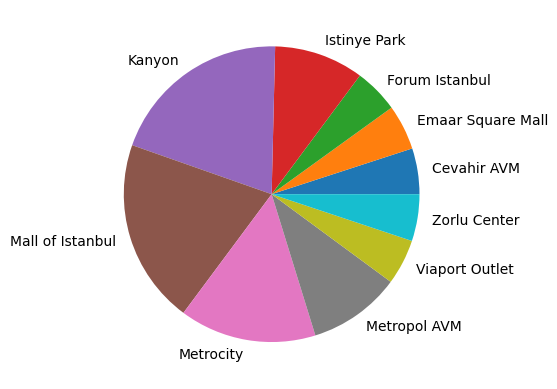

In [35]:
plt.pie(branch_sales['price'],labels=branch_sales.index)
plt.show()

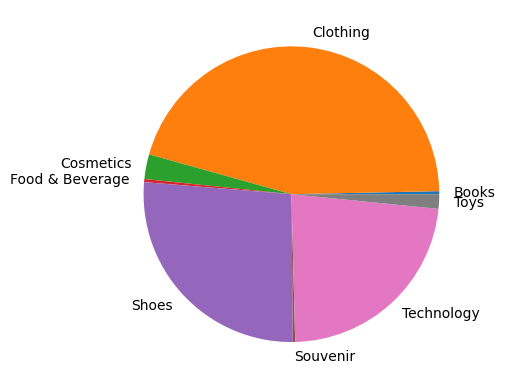

In [36]:
# pie chart for sales by product category

plt.pie(category_sales["price"], labels = category_sales.index)
plt.show()

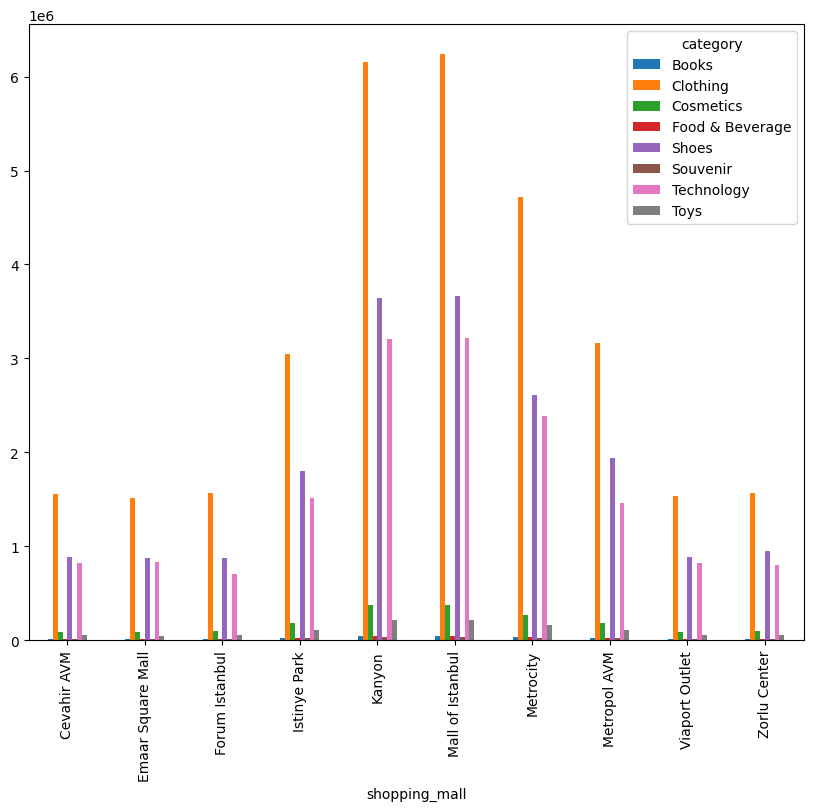

In [38]:
combined_pivot = df.pivot_table(index ='shopping_mall' , columns = 'category',values = 'price' , aggfunc = 'sum')
combined_pivot.plot(kind='bar' , figsize=(10,8))
plt.show()

In [4]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [ ]:
# practice

In [6]:
df.drop(['invoice_no', 'customer_id', 'gender', 'age'],axis=1,inplace=True)

In [13]:
df

,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...
99452,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [18]:
# region wise sales

df.groupby('shopping_mall').count()

,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,
Cevahir AVM,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914


In [15]:
df.groupby('category').count()

,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,
Books,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087


In [10]:
branch_sales = df.groupby('shopping_mall').sum()

In [11]:
branch_sales

,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,
Cevahir AVM,ClothingToysFood & BeverageClothingShoesFood &...,14949,3433671.84,CashCashCashCredit CardCashCashCredit CardDebi...,17/11/20227/3/20231/5/202118/06/202223/08/2022...
Emaar Square Mall,BooksClothingShoesClothingFood & BeverageCosme...,14501,3390408.31,Credit CardCredit CardCashCredit CardCredit Ca...,28/10/202215/02/202310/10/202221/11/20214/1/20...
Forum Istanbul,ShoesClothingBooksShoesFood & BeverageClothing...,14852,3336073.82,Debit CardCredit CardDebit CardCashCashCredit ...,12/12/202124/05/202213/06/202110/9/20229/8/202...
Istinye Park,CosmeticsToysCosmeticsBooksCosmeticsClothingSo...,29465,6717077.54,CashDebit CardCredit CardCashCredit CardCashDe...,13/03/202216/05/202129/04/202124/02/202312/1/2...
Kanyon,ClothingBooksClothingClothingTechnologyShoesCl...,59457,13710755.24,Credit CardCashCredit CardCredit CardCashCredi...,5/8/202224/10/202122/08/20213/6/202226/10/2021...
Mall of Istanbul,ClothingCosmeticsToysCosmeticsClothingClothing...,60114,13851737.62,Credit CardCredit CardDebit CardCredit CardCre...,13/01/202120/04/20224/7/202212/1/20239/6/20226...
Metrocity,ClothingClothingFood & BeverageToysBooksBooksC...,44894,10249980.07,CashCredit CardCashDebit CardDebit CardCashDeb...,9/11/20214/11/202125/12/202231/07/202216/01/20...
Metropol AVM,ShoesClothingClothingCosmeticsCosmeticsClothin...,30530,6937992.99,Credit CardCashCashCredit CardDebit CardDebit ...,16/05/202126/07/202119/12/202214/02/20229/5/20...
Viaport Outlet,ShoesFood & BeverageTechnologyClothingClothing...,14716,3414019.46,Credit CardDebit CardCredit CardCredit CardCas...,7/11/202112/3/202125/05/202214/09/202112/1/202...


In [25]:
# Step 1: Create a new column for sales amount
df['sales_amount'] = df['quantity'] * df['price']

# Step 2: Group by shopping_mall and calculate total sales for each region
branch_sales = df.groupby('shopping_mall')['sales_amount'].sum().reset_index()

# Display the result
print('top performing branches across region')
print(branch_sales)


top performing branches across region
       shopping_mall  sales_amount
0        Cevahir AVM   12645138.20
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24
3       Istinye Park   24618827.68
4             Kanyon   50554231.10
5   Mall of Istanbul   50872481.68
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
8     Viaport Outlet   12521339.72
9       Zorlu Center   12901053.82


In [21]:
df

,category,quantity,price,payment_method,invoice_date,shopping_mall,sales_amount
0,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...
99452,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [23]:
branch_sales.sort_values(by="sales_amount",ascending=False)

,shopping_mall,sales_amount
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


In [26]:
category_sales = df.groupby('category')['sales_amount'].sum().reset_index()

print("Top performing categories")
print(category_sales)

Top performing categories
          category  sales_amount
0            Books  8.345529e+05
1         Clothing  1.139968e+08
2        Cosmetics  6.792863e+06
3  Food & Beverage  8.495351e+05
4            Shoes  6.655345e+07
5         Souvenir  6.358247e+05
6       Technology  5.786235e+07
7             Toys  3.980426e+06


In [29]:
category_sales.sort_values(by='sales_amount',ascending = False)


,category,sales_amount
1,Clothing,1.139968e+08
4,Shoes,6.655345e+07
6,Technology,5.786235e+07
2,Cosmetics,6.792863e+06
7,Toys,3.980426e+06
3,Food & Beverage,8.495351e+05
0,Books,8.345529e+05
5,Souvenir,6.358247e+05


In [34]:
# Check the column names
print(branch_sales.columns)


Index(['shopping_mall', 'sales_amount'], dtype='object')


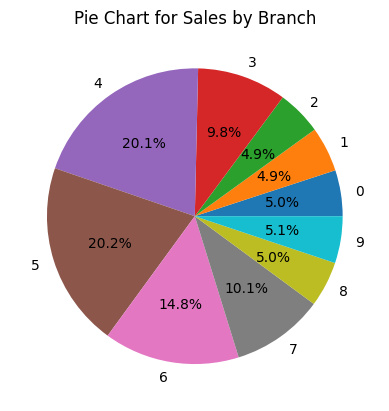

In [39]:
import matplotlib.pyplot as plt

# Replace 'sales_amount' with the actual column name if it is different
plt.pie(branch_sales['sales_amount'], labels=branch_sales.index, autopct='%1.1f%%')
plt.title("Pie Chart for Sales by Branch")
plt.show()
